<a href="https://colab.research.google.com/github/wp132316/DBCourse/blob/main/week11_lab_session.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import sqlite3 as sl

In [2]:
con = sl.connect('my-test.db')

In [3]:
with con:
  con.execute("""CREATE TABLE USER (
    id INTEGER NOT NULL PRIMARY KEY AUTOINCREMENT, name TEXT,
    age INTEGER);
""")

In [4]:
sql = 'INSERT INTO USER (id, name, age) values(?, ?, ?)'

In [7]:
data = [(1, 'Alice', 21), (2, 'Bob', 22), (3, 'Chris', 23)]

In [8]:
with con:
  con.executemany(sql, data)  

In [9]:
with con:
  data = con.execute("SELECT * FROM USER WHERE age <= 22")
  for row in data:
    print(row)

(1, 'Alice', 21)
(2, 'Bob', 22)


In [10]:
import pandas as pd

In [11]:
df_skill = pd.DataFrame({
    'user_id': [1,1,2,2,3,3,3],
    'skill': ['Network Security', 'Algorithm Development', 'Network Security', 'Java', 'Python', 'Date Science', 'Machine Learning']
})
df_skill

,user_id,skill
0,1,Network Security
1,1,Algorithm Development
2,2,Network Security
3,2,Java
4,3,Python
5,3,Date Science
6,3,Machine Learning


In [12]:
df_skill.to_sql('SKILL', con)

In [13]:
df = pd.read_sql('''
SELECT s.user_id, u.name, u.age, s.skill
FROM USER u LEFT JOIN SKILL s ON u.id = s.user_id''', con)
df

,user_id,name,age,skill
0,1,Alice,21,Algorithm Development
1,1,Alice,21,Network Security
2,2,Bob,22,Java
3,2,Bob,22,Network Security
4,3,Chris,23,Date Science
5,3,Chris,23,Machine Learning
6,3,Chris,23,Python


In [14]:
df.to_sql('USER_SKILL', con)

In [15]:
%load_ext sql

In [16]:
from random import uniform, choice

In [17]:
import time

In [19]:
from datetime import datetime, timedelta

In [23]:
%matplotlib inline

In [24]:
%sql sqlite:///demo.db3

'Connected: @demo.db3'

In [26]:
%sql SELECT date('now');

 * sqlite:///demo.db3
Done.


date('now')
2022-11-09


In [27]:
%sql SELECT date('now', 'start of month', '+1 month', '-1 day');

 * sqlite:///demo.db3
Done.


"date('now', 'start of month', '+1 month', '-1 day')"
2022-11-30


In [28]:
%%sql sqlite://
DROP TABLE IF EXISTS Temperature;
CREATE TABLE Temperature (Timestamp DATETIME NOT NULL, Temperature NUMERIC NOT NULL)

Done.
Done.


[]

In [29]:
%%sql sqlite://
CREATE UNIQUE INDEX idx_timestamp ON Temperature(Timestamp);

Done.


[]

In [35]:
def dt(days):
  return timedelta(days=days)

N_rows = 500
now = datetime.now()

for i in range(N_rows):
  timestamp = now - dt(days=(N_rows - i))
  temperature = uniform(18, 26)
  %sql INSERT INTO Temperature VALUES (:timestamp, :temperature)

 * sqlite:///demo.db3
1 rows affected.
 * sqlite:///demo.db3
1 rows affected.
 * sqlite:///demo.db3
1 rows affected.
 * sqlite:///demo.db3
1 rows affected.
 * sqlite:///demo.db3
1 rows affected.
 * sqlite:///demo.db3
1 rows affected.
 * sqlite:///demo.db3
1 rows affected.
 * sqlite:///demo.db3
1 rows affected.
 * sqlite:///demo.db3
1 rows affected.
 * sqlite:///demo.db3
1 rows affected.
 * sqlite:///demo.db3
1 rows affected.
 * sqlite:///demo.db3
1 rows affected.
 * sqlite:///demo.db3
1 rows affected.
 * sqlite:///demo.db3
1 rows affected.
 * sqlite:///demo.db3
1 rows affected.
 * sqlite:///demo.db3
1 rows affected.
 * sqlite:///demo.db3
1 rows affected.
 * sqlite:///demo.db3
1 rows affected.
 * sqlite:///demo.db3
1 rows affected.
 * sqlite:///demo.db3
1 rows affected.
 * sqlite:///demo.db3
1 rows affected.
 * sqlite:///demo.db3
1 rows affected.
 * sqlite:///demo.db3
1 rows affected.
 * sqlite:///demo.db3
1 rows affected.
 * sqlite:///demo.db3
1 rows affected.
 * sqlite:///demo.db3
1 r

In [36]:
%sql SELECT datetime(Timestamp) as Date, Temperature FROM Temperature LIMIT 5

 * sqlite:///demo.db3
Done.


Date,Temperature
2021-06-27 09:42:30,20.02409390612455
2021-06-28 09:42:30,21.30345586811015
2021-06-29 09:42:30,25.02180303573469
2021-06-30 09:42:30,22.154311771657632
2021-07-01 09:42:30,20.03981292398873


In [37]:
%%sql sqlite://
SELECT Timestamp as Date, Temperature
FROM Temperature
WHERE Date <= '2022-06-31 14:21:45'

Done.


Date,Temperature
2021-06-27 09:42:30.323454,20.02409390612455
2021-06-28 09:42:30.323454,21.30345586811015
2021-06-29 09:42:30.323454,25.02180303573469
2021-06-30 09:42:30.323454,22.154311771657632
2021-07-01 09:42:30.323454,20.03981292398873
2021-07-02 09:42:30.323454,25.843423926052633
2021-07-03 09:42:30.323454,23.809054000374243
2021-07-04 09:42:30.323454,18.66920048530242
2021-07-05 09:42:30.323454,18.810875081117807
2021-07-06 09:42:30.323454,23.474287101891733


In [38]:
%%sql sqlite://
SELECT Timestamp as Date, Temperature
FROM Temperature
WHERE CAST(strftime('%Y', Date) as Int) = 2021

Done.


Date,Temperature
2021-06-27 09:42:30.323454,20.02409390612455
2021-06-28 09:42:30.323454,21.30345586811015
2021-06-29 09:42:30.323454,25.02180303573469
2021-06-30 09:42:30.323454,22.154311771657632
2021-07-01 09:42:30.323454,20.03981292398873
2021-07-02 09:42:30.323454,25.843423926052633
2021-07-03 09:42:30.323454,23.809054000374243
2021-07-04 09:42:30.323454,18.66920048530242
2021-07-05 09:42:30.323454,18.810875081117807
2021-07-06 09:42:30.323454,23.474287101891733


In [41]:
%%sql sqlite://
SELECT strftime('%Y', Timestamp) as Year,
AVG(Temperature) AS MEAN_TMP,
MAX(Temperature) AS MAX_TMP,
MIN(Temperature) AS MIN_TMP
FROM Temperature
GROUP BY strftime('%Y', Timestamp)

Done.


Year,MEAN_TMP,MAX_TMP,MIN_TMP
2021,22.10507006192088,25.8973428910642,18.00416852337809
2022,22.18166409408892,25.98948946026242,18.051413068007257


In [43]:
ts = %sql SELECT datetime(Timestamp) as date, Temperature FROM Temperature
df = ts.DataFrame()
df.set_index("date", inplace = True)
df.index = pd.to_datetime(df.index)
df.index

 * sqlite:///demo.db3
Done.


DatetimeIndex(['2021-06-27 09:42:30', '2021-06-28 09:42:30',
               '2021-06-29 09:42:30', '2021-06-30 09:42:30',
               '2021-07-01 09:42:30', '2021-07-02 09:42:30',
               '2021-07-03 09:42:30', '2021-07-04 09:42:30',
               '2021-07-05 09:42:30', '2021-07-06 09:42:30',
               ...
               '2022-10-30 09:42:30', '2022-10-31 09:42:30',
               '2022-11-01 09:42:30', '2022-11-02 09:42:30',
               '2022-11-03 09:42:30', '2022-11-04 09:42:30',
               '2022-11-05 09:42:30', '2022-11-06 09:42:30',
               '2022-11-07 09:42:30', '2022-11-08 09:42:30'],
              dtype='datetime64[ns]', name='date', length=500, freq=None)

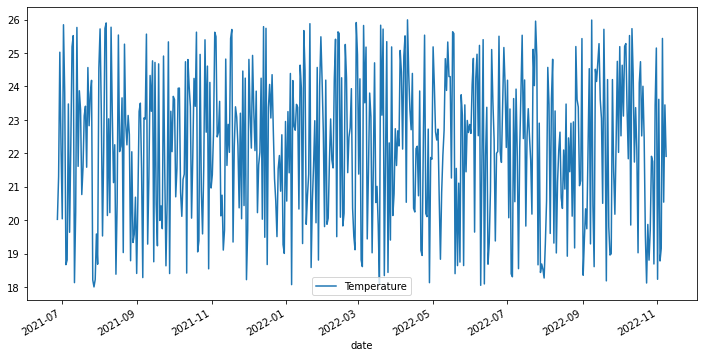

In [44]:
df.plot(figsize=(12, 6))